In [1]:
import numpy as np #used for mathematical operation
import pandas as pd #used for data pre_processing
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used advance  visualization

In [2]:
df=pd.read_csv("IPL_matches_dataset.csv")
df.head() #return top 5 rows

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Pre-Match Analysis
<pre>
1)Number of matchs played in each IPL season.
2)Toss winner(Team winning most tosses).
3)Toss decision(bat or field)in each IPL season.
4)Toss decision percentage.
5)Top to most frequently used stadiums.
6)City that hosted most IPL matchs in all the seasons(Top 7 cities).
7)Top 5 umpire 1 who evaluate most no of the matches in all the IPL seasons.
</pre>

In [3]:
df.shape #to obtaion rows(756) and columns(18)

(756, 18)

In [4]:
df.isnull().sum()#to get how many null values are there in every columns

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
df.dtypes#to get data types

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [6]:
df.info()#it gives information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
df.describe()#to get statistics information

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [8]:
df.index

RangeIndex(start=0, stop=756, step=1)

# EDA using matplotlib and seaborn

## Number of matches played in each IPL season

In [9]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
df["Season"].value_counts()#to count matches played in each season

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

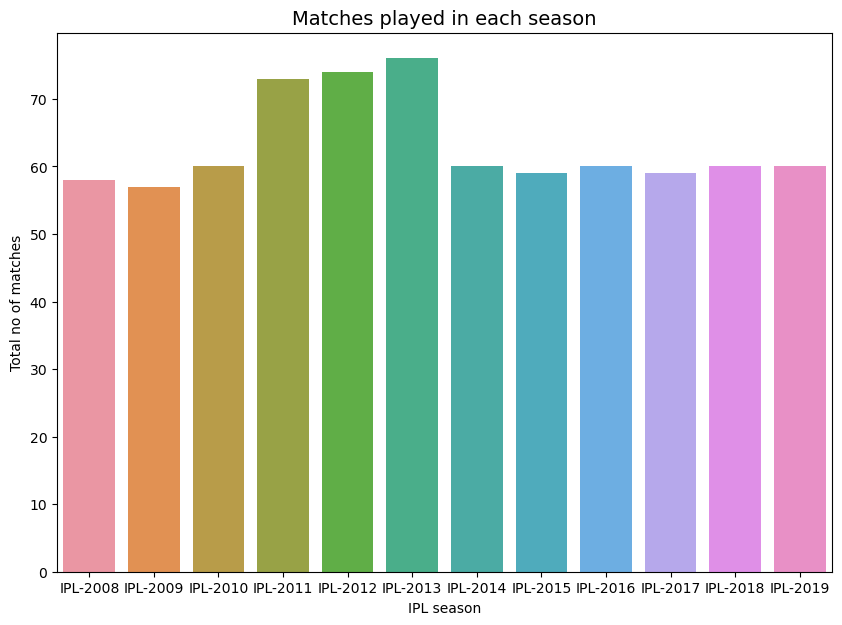

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x="Season",data=df,
              order=df["Season"].value_counts().index.sort_values() #to arrange to season
             )
plt.title("Matches played in each season",fontsize=14)
plt.xlabel("IPL season")
plt.ylabel("Total no of matches")
plt.show()

### Inference
Most no of matches were played in IPL 2013 followed by IPL 2012

## Toss winner(Team winning most tosses)

In [12]:
df["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

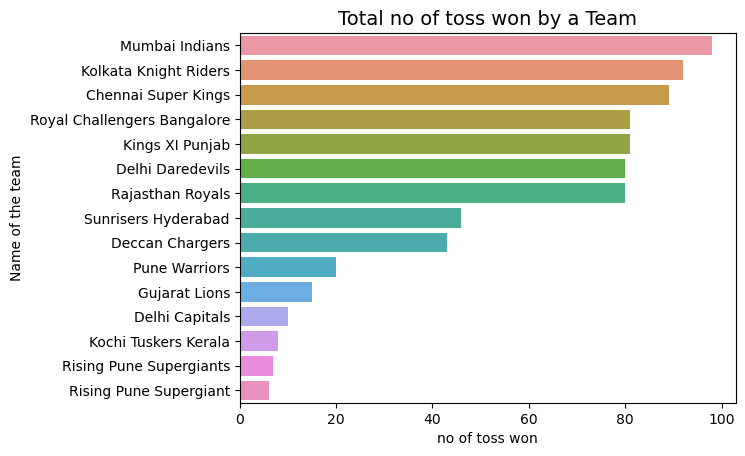

In [13]:
sns.countplot(y="toss_winner",data=df,
              order=df["toss_winner"].value_counts().index #to arrange to season
             )
plt.title("Total no of toss won by a Team",fontsize=14)
plt.xlabel("no of toss won")
plt.ylabel("Name of the team")
plt.show()

### Inference
Mumbai Indian has won most of toss followed by Kolkata Knight Riders

## Toss decision(bat or field)in each IPL season

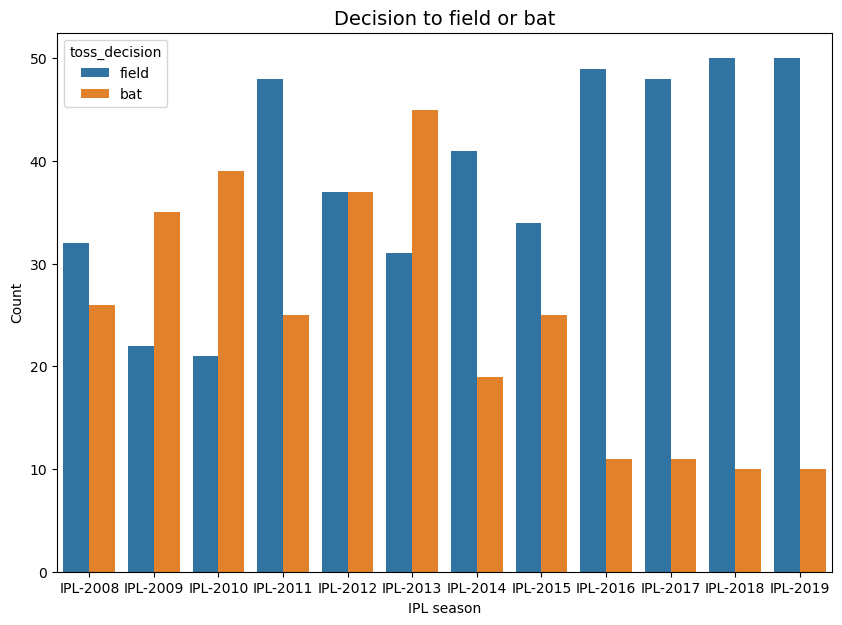

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x="Season",data=df,hue="toss_decision",
              order=df["Season"].value_counts().index.sort_values() #to arrange to season
             )
plt.title("Decision to field or bat",fontsize=14)
plt.xlabel("IPL season")
plt.ylabel("Count")
plt.show()

### Inference 
<pre>1)There is trend of field after IPL 2015
2)Team mostly choose Field in across all the season</pre>

## Toss decision percentage

In [15]:
df["toss_decision"].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [16]:
toss=df["toss_decision"].value_counts()

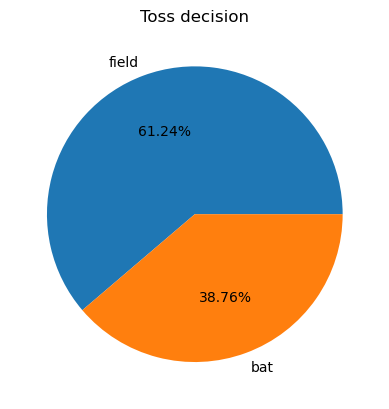

In [17]:
plt.pie(toss.values,labels=toss.index,autopct="%.2f%%")
plt.title("Toss decision")
plt.show()

### Inference
Teams mostly Choose fielding after winning the toss

## Top to most frequently used stadiums

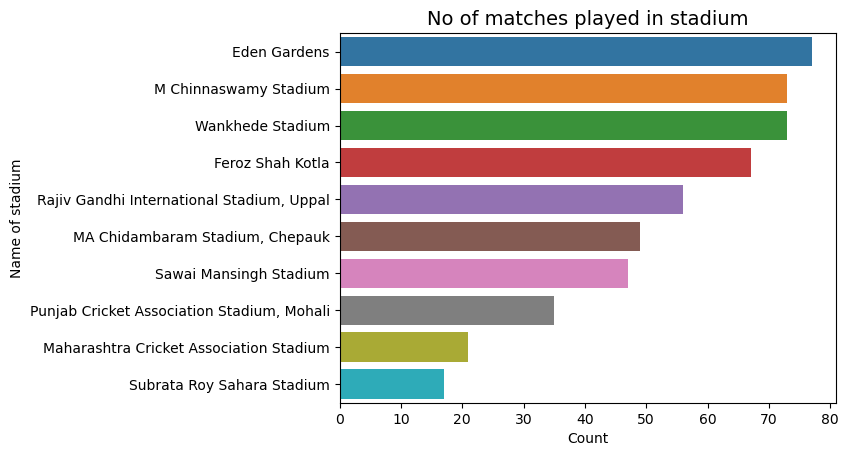

In [18]:
sns.countplot(y="venue",data=df,order=df["venue"].value_counts()[:10].index)
plt.xlabel("Count")
plt.ylabel("Name of stadium")
plt.title("No of matches played in stadium",fontsize=14)
plt.show()

### Inference
Most no of matches are played in Eden Garden Stadium

## City that hosted most IPL matches in all the seasons(Top 7 cities)

In [19]:
df["city"].value_counts()[:7]

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Chennai       57
Jaipur        47
Name: city, dtype: int64

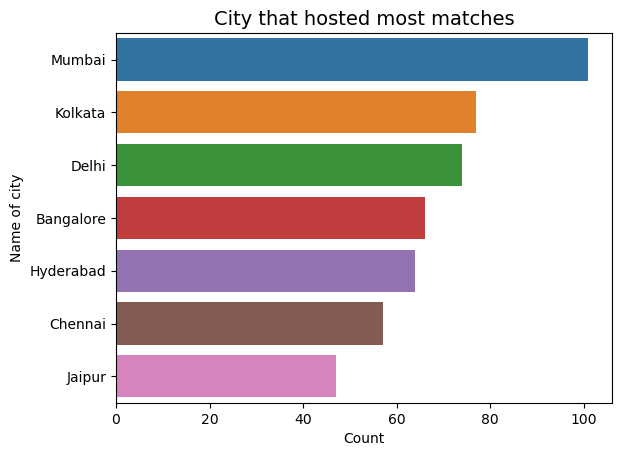

In [20]:
sns.countplot(y="city",data=df,order=df["city"].value_counts()[:7].index)
plt.xlabel("Count")
plt.ylabel("Name of city")
plt.title("City that hosted most matches",fontsize=14)
plt.show()

### Inference 
Most of matches are hosted in Mumbai

## Top 5 umpire 1 who evaluate most no of the matches in all the IPL season

In [21]:
df["umpire1"].value_counts()[:5]

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
Name: umpire1, dtype: int64

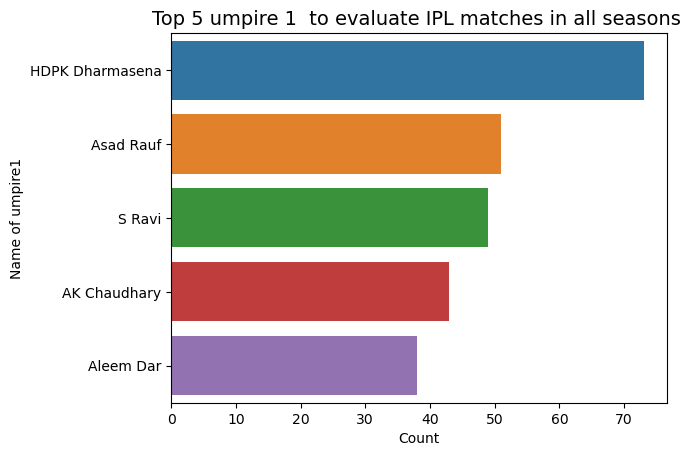

In [22]:
sns.countplot(y="umpire1",data=df,order=df["umpire1"].value_counts()[:5].index)
plt.xlabel("Count")
plt.ylabel("Name of umpire1")
plt.title("Top 5 umpire 1  to evaluate IPL matches in all seasons ",fontsize=14)
plt.show()

### Inference 
HDPK Dharmasena evaluted most matches as umpire 1

# 2)Post Match Analysis
<pre>
1)Team that won the most of he matches across all the IPL seasons.
2)Percentage distribution of the differnt winning teams(top 8) acroos all the IPL seasons.
3)Top 7 players with most player of the match awards.
4)Win toss to game.
5)Win by runs (how many times each IPL teams hass won the match by runs).
6)Win by wickets (how many times each IPL teams has won the match by wickets).
</pre>

## Team that won the most of the matches across all the IPL seasons

In [23]:
df["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

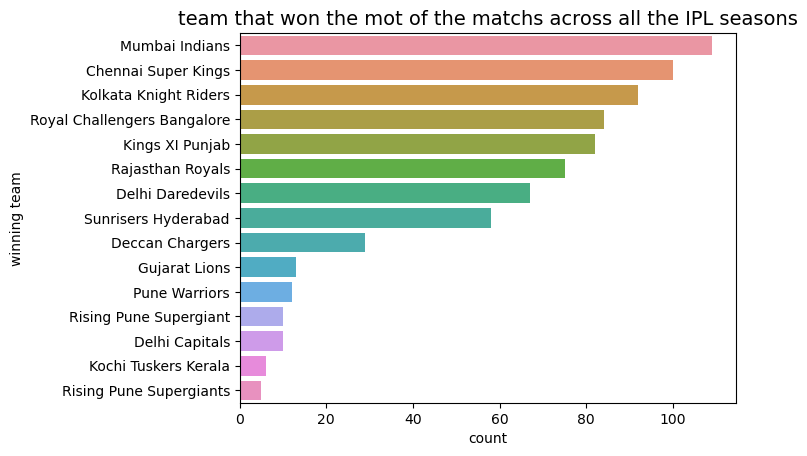

In [24]:
sns.countplot(y="winner",data=df,order=df["winner"].value_counts().index)
plt.xlabel("count")
plt.ylabel("winning team")
plt.title("team that won the mot of the matchs across all the IPL seasons",fontsize=14)
plt.show()

## Inference
mumbai indian is the team that has mostbof matches across all the season followed by Chennai super kings

## Percentage distribution of different winning teams(top 8) across all the IPL seasons

In [25]:
df["winner"].value_counts()[:8]

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Name: winner, dtype: int64

<AxesSubplot:title={'center':'win Percentage across all the ipl seasons'}, ylabel='winner'>

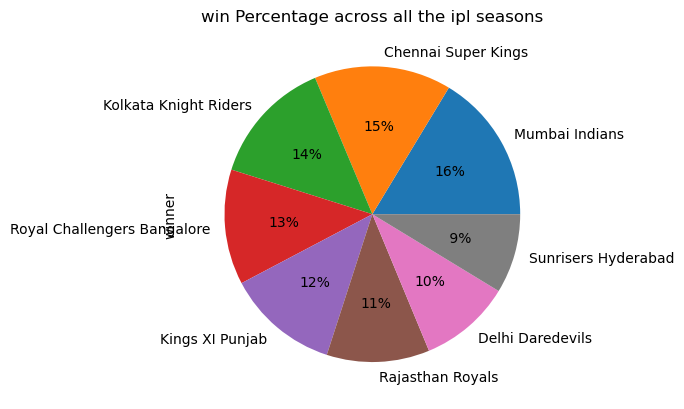

In [26]:
df["winner"].value_counts()[:8].plot(kind="pie",
                                title="win Percentage across all the ipl seasons",
                                autopct="%2.f%%")

### Inference
Mumbai Indians has won 16% of there matches followed by Chennai Super Kings 15%

## Top 7 players with most Player of Matches

In [27]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [28]:
r1=df["player_of_match"].value_counts()[:7]
r1

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
Name: player_of_match, dtype: int64

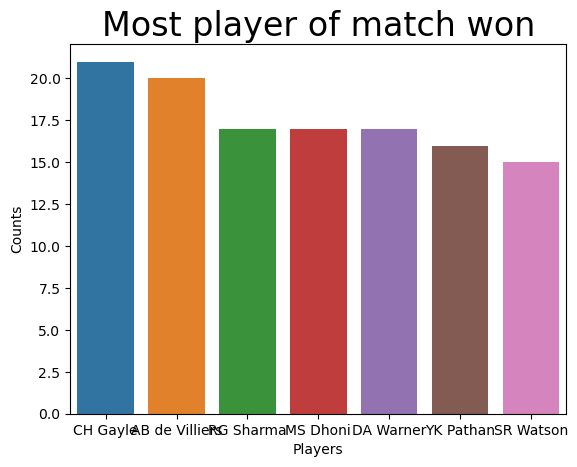

In [29]:
sns.barplot(x=r1.index,y=r1.values)
plt.title("Most player of match won",fontsize=24)
plt.ylabel("Counts")
plt.xlabel("Players")
plt.show()

### Inference 
Chris Gayle has won the most player of award followed by AB de Villiers

## win toss to game

In [30]:
df["win_toss_to_game"]=(df["toss_winner"]==df["winner"])
df[["team1","team2","toss_winner","winner","win_toss_to_game"]].head()

,team1,team2,toss_winner,winner,win_toss_to_game
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,False
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,True
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,True
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,True
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,True


In [31]:
df["win_toss_to_game"]=np.where(df["win_toss_to_game"]==True,"Win","Lose")

In [32]:
r2=df["win_toss_to_game"].value_counts()
r2

Win     393
Lose    363
Name: win_toss_to_game, dtype: int64

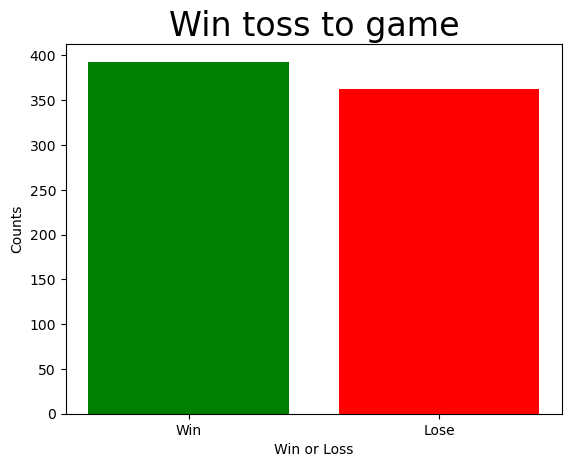

In [33]:
plt.bar(r2.index,r2.values,color=["green","red"])
plt.title("Win toss to game",fontsize=24)
plt.ylabel("Counts")
plt.xlabel("Win or Loss")
plt.show()

### Inference
Across all the IPL seasons in 393 matches, the toss winner emerged as the match winner as well and in 363 matches the toss winner lost the match.

## Win by runs(how many times each IPL has won the match by runs)

In [34]:
count_win_by_runs_per_team={}
for i in df["team1"].unique():
    win_team=df[df["winner"]==i]
    print("Team",i)
    print(win_team[win_team["win_by_runs"]!=0].shape)
    count_win_by_runs_per_team[i]=win_team[win_team["win_by_runs"]!=0].shape[0]

Team Sunrisers Hyderabad
(30, 19)
Team Mumbai Indians
(57, 19)
Team Gujarat Lions
(1, 19)
Team Rising Pune Supergiant
(5, 19)
Team Royal Challengers Bangalore
(35, 19)
Team Kolkata Knight Riders
(36, 19)
Team Delhi Daredevils
(25, 19)
Team Kings XI Punjab
(38, 19)
Team Chennai Super Kings
(52, 19)
Team Rajasthan Royals
(27, 19)
Team Deccan Chargers
(18, 19)
Team Kochi Tuskers Kerala
(2, 19)
Team Pune Warriors
(6, 19)
Team Rising Pune Supergiants
(2, 19)
Team Delhi Capitals
(3, 19)


In [35]:
print(count_win_by_runs_per_team)

{'Sunrisers Hyderabad': 30, 'Mumbai Indians': 57, 'Gujarat Lions': 1, 'Rising Pune Supergiant': 5, 'Royal Challengers Bangalore': 35, 'Kolkata Knight Riders': 36, 'Delhi Daredevils': 25, 'Kings XI Punjab': 38, 'Chennai Super Kings': 52, 'Rajasthan Royals': 27, 'Deccan Chargers': 18, 'Kochi Tuskers Kerala': 2, 'Pune Warriors': 6, 'Rising Pune Supergiants': 2, 'Delhi Capitals': 3}


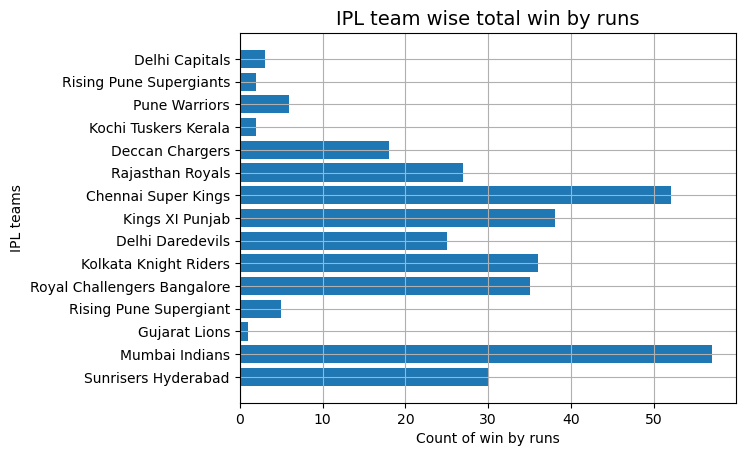

In [36]:
plt.barh(list(count_win_by_runs_per_team.keys()),list(count_win_by_runs_per_team.values()))
plt.title("IPL team wise total win by runs",fontsize=14)
plt.xlabel("Count of win by runs")
plt.ylabel("IPL teams")
plt.grid()
plt.show()

### Inference
MI has most of the matches by batting first followed by Chennai Super Kings

## Win by wickets(how many times each IPL has won the match by wickets)

In [37]:
count_win_by_wickets_per_team={}
for i in df["team1"].unique():
    win_team=df[df["winner"]==i]
    print("Team",i)
    print(win_team[win_team["win_by_wickets"]!=0].shape)
    count_win_by_wickets_per_team[i]=win_team[win_team["win_by_runs"]!=0].shape[0]

Team Sunrisers Hyderabad
(27, 19)
Team Mumbai Indians
(50, 19)
Team Gujarat Lions
(12, 19)
Team Rising Pune Supergiant
(5, 19)
Team Royal Challengers Bangalore
(48, 19)
Team Kolkata Knight Riders
(56, 19)
Team Delhi Daredevils
(42, 19)
Team Kings XI Punjab
(42, 19)
Team Chennai Super Kings
(48, 19)
Team Rajasthan Royals
(46, 19)
Team Deccan Chargers
(11, 19)
Team Kochi Tuskers Kerala
(4, 19)
Team Pune Warriors
(6, 19)
Team Rising Pune Supergiants
(3, 19)
Team Delhi Capitals
(6, 19)


In [38]:
print(count_win_by_wickets_per_team)

{'Sunrisers Hyderabad': 30, 'Mumbai Indians': 57, 'Gujarat Lions': 1, 'Rising Pune Supergiant': 5, 'Royal Challengers Bangalore': 35, 'Kolkata Knight Riders': 36, 'Delhi Daredevils': 25, 'Kings XI Punjab': 38, 'Chennai Super Kings': 52, 'Rajasthan Royals': 27, 'Deccan Chargers': 18, 'Kochi Tuskers Kerala': 2, 'Pune Warriors': 6, 'Rising Pune Supergiants': 2, 'Delhi Capitals': 3}


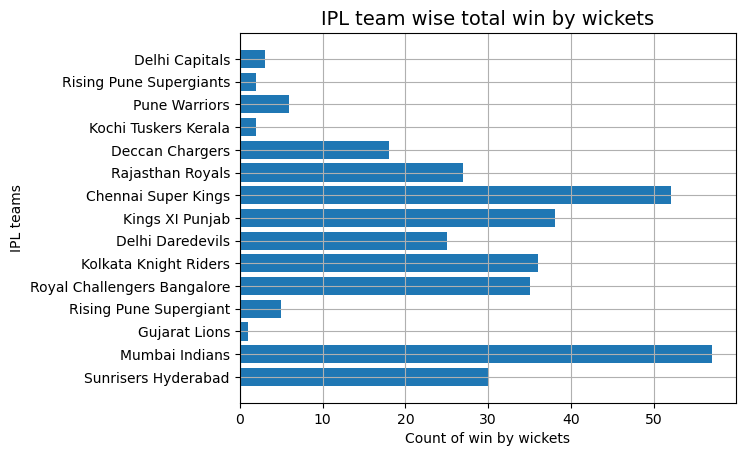

In [39]:
plt.barh(list(count_win_by_wickets_per_team.keys()),list(count_win_by_wickets_per_team.values()))
plt.title("IPL team wise total win by wickets",fontsize=14)
plt.xlabel("Count of win by wickets")
plt.ylabel("IPL teams")
plt.grid()
plt.show()

### inference 
Kolkata Knight Riders have won most of the matches based on win by wickets,followed by Mumbai Indians and Chennai Super Kings

# 3)Team wise analysis - MI and CSK

### Mi

In [40]:
mi=df[(df["team1"]=="Mumbai Indians")|(df["team2"]=="Mumbai Indians")]
mi.shape


(187, 19)

## Performace of MI against other teams

In [41]:
mi_win_loss=mi["winner"].value_counts()
mi_win_loss

Mumbai Indians                 109
Kings XI Punjab                 11
Chennai Super Kings             11
Delhi Daredevils                11
Rajasthan Royals                10
Royal Challengers Bangalore      9
Sunrisers Hyderabad              7
Kolkata Knight Riders            6
Deccan Chargers                  4
Rising Pune Supergiant           3
Gujarat Lions                    2
Kochi Tuskers Kerala             1
Pune Warriors                    1
Rising Pune Supergiants          1
Delhi Capitals                   1
Name: winner, dtype: int64

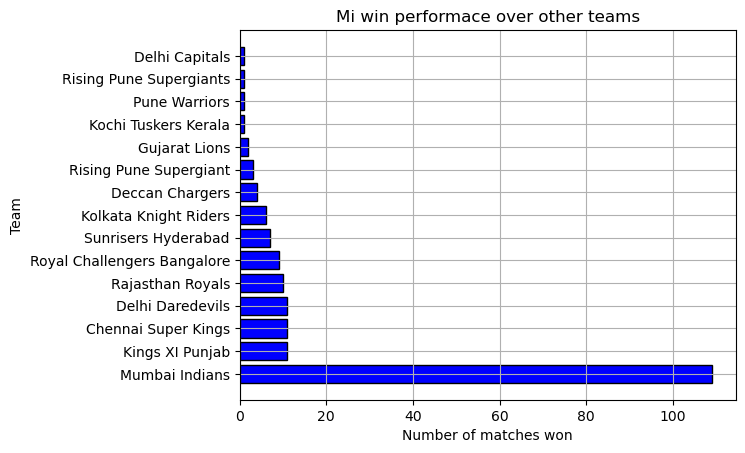

In [42]:
plt.barh(width=mi_win_loss.values,y=mi_win_loss.index,color="blue",edgecolor="black")
plt.title("Mi win performace over other teams")
plt.xlabel("Number of matches won")
plt.ylabel("Team")
plt.grid()
plt.show()

### Inference 
Mi has won 109 times when compared to the losses against it.

### Csk


In [43]:
csk=df[(df["team1"]=="Chennai Super Kings")|(df["team2"]=="Chennai Super Kings")]
csk.shape

(164, 19)

### Performace of CSK against other teams

In [44]:
csk_win_loss=csk["winner"].value_counts()
csk_win_loss

Chennai Super Kings            100
Mumbai Indians                  17
Kings XI Punjab                  9
Royal Challengers Bangalore      8
Rajasthan Royals                 7
Kolkata Knight Riders            7
Delhi Daredevils                 6
Deccan Chargers                  4
Sunrisers Hyderabad              3
Pune Warriors                    2
Kochi Tuskers Kerala             1
Name: winner, dtype: int64

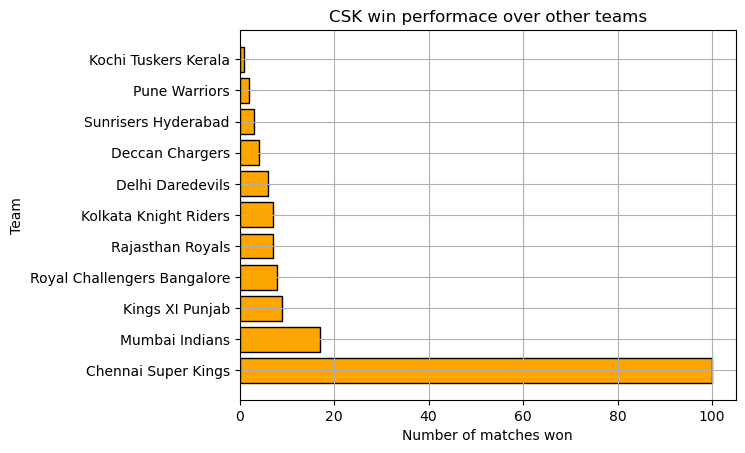

In [45]:
plt.barh(width=csk_win_loss.values,y=csk_win_loss.index,color="orange",edgecolor="black")
plt.title("CSK win performace over other teams")
plt.xlabel("Number of matches won")
plt.ylabel("Team")
plt.grid()
plt.show()

### Inference 
CSK has won 100 times when compared to the losses against it.

## overall inference
### 1)Pre-Match Analysis
<pre>
<b><br>1)Number of matches played in each IPL season</b></br>
Most no of matches were played in IPL 2013 followed by IPL 2012
<b><br>2)Toss winner(Team winning most tosses)</b></br>
Mumbai Indian has won most of toss followed by Kolkata Knight Riders
<b><br>3)Toss decision(bat or field)in each IPL season</b></br>
1)There is trend of field after IPL 2015
2)Team mostly choose Field in across all the season
<b><br>4)Toss decision percentage</b></br>
Teams mostly Choose fielding after winning the toss
<b><br>5)Top to most frequently used stadiums</b></br>
Most no of matches are played in Eden Garden Stadium
<b><br>6)City that hosted most IPL matchs in all the seasons(Top 7 cities)</b></br>
Most of matches are hosted in Mumbai
<b><br>7)Top 5 umpire 1 who evaluate most no of the matches in all the IPL season</b></br>
HDPK Dharmasena evaluted most matches as umpire 1
</pre>
### 2)Post Match Analysis
<pre>
<b><br>1)Team that won the most of he matches across all the IPL seasons</b></br>
Mumbai Indian is the team that has mostbof matches across all the season followed by Chennai Super King
<b><br>2)Percentage distribution of the different winning teams(top 8) acroos all the IPL seasons</b></br>
Mumbai Indians has won 16% of there matches followed by Chennai Super Kings 15%
<b><br>3)Top 7 players with most player of the match awards</b></br>
Chris Gayle has won the most player of award followed by AB de Villiers
<b><br>4)Win toss to game</b></br>
Across all the IPL seasons in 393 matches the toss winner emerged as the match winner as well and in 363 matches the toss winner lost the match.
<b><br>5)Win by runs (how many times each IPL teams hass won the match by runs)</b></br>
MI has most of the matches by batting first followed by Chennai super kings
<b><br>6)Win by wickets (how many times each IPL teams hass won the match by wickets)</b></br>
Kolkata Knight Riders have won most of the matches based on win by wickets,followed by Mumbai Indian
</pre>
### 3)Team wise analysis- MI and CSK
<pre>
<b><br>1)Performace of MI against other teams</b></br>
MI has 109 times when compared to the losses against it.
<b><br>2)Performace of CSK against other teams</b></br>
CSK has 100 times when compared to the losses against it.